In [1]:
print("hello world")

hello world


In [294]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class LinReg:
    """A linear regression object that can take in data
    and compute slope and intercept of a best-fit line"""
    
    def __init__(self, datapoints, col_names, ix_col=False):
        self.col_names = col_names
        if ix_col == False:
            self.ix_col = self.col_names[0]
        else:
            self.ix_col = ix_col
        self.df = pd.DataFrame(data=datapoints, columns=col_names)
        #self.df = self.df.set_index(self.ix_col)
        #self.df = self.df.sort_index()
        self.b0 = 0
        self.b1 = 0
    
    def show_points(self):
        self.df.set_index(myreg.col_names[0]).sort_index().plot(style='o')
    
    def fit(self):
        n = len(myreg.df.values)
        x_bar = sum([x for x,y in myreg.df.values]) / n
        y_bar = sum([y for x,y in myreg.df.values]) / n
        sum_x2 = sum([x*x for x,y in myreg.df.values])
        sum_xy = sum([x*y for x,y in myreg.df.values])
        
        self.b1 = (sum_xy - n * x_bar * y_bar) / (sum_x2 - n * (x_bar**2))
        self.b0 = y_bar - self.b1 * x_bar
    
    def show_line(self):
        print("y = " + str(self.b1) + " x + " + str(self.b0))
        x_vals = self.df.set_index(myreg.col_names[0]).sort_index().index
        y_vals = self.b0 + self.b1 * x_vals
        plt.plot(self.df.set_index(myreg.col_names[0]).sort_index(), '.', color='orange')
        plt.plot(x_vals, y_vals, '-', color='black')
        plt.show()

In [295]:
myreg = LinReg([(1250,365000),(1500,400000),(900,240000),(1370,375000),(2400,520000)],['sq feet','price'],ix_col='sq feet')

In [296]:
myreg.df.set_index('sq feet').sort_index().index

Int64Index([900, 1250, 1370, 1500, 2400], dtype='int64', name='sq feet')

In [297]:
myreg.df.sort_values(by=[myreg.col_names[0]])['sq feet'][-1:]

4    2400
Name: sq feet, dtype: int64

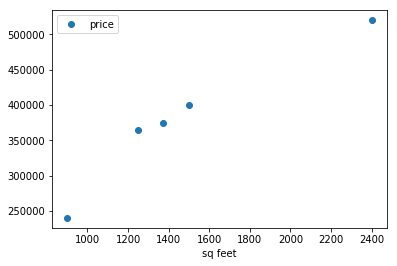

In [298]:
myreg.df.set_index(myreg.col_names[0]).sort_index().plot(style='o')

y = 0 x + 0


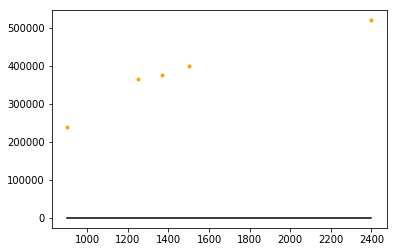

In [299]:
myreg.show_line()

y = 171.77835464538666 x + 125080.92170624621


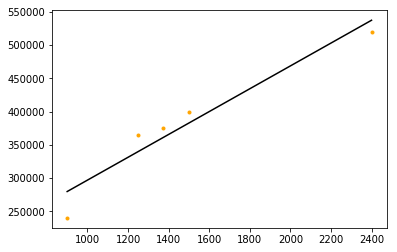

In [300]:
myreg.fit()
myreg.show_line()

In [438]:
import random

def gen_data(num_points): # non linear to show the good and bad of linear regression
    data = []
    for i in range(0,num_points):
        sq_feet = random.randint(800,2501) + i
        price = sq_feet * 225 + random.randint(5000,50000) * (-1) ** random.randint(1,3) + sq_feet * i * 2
        data.append((sq_feet,price))
    return data

In [439]:
gen_data(3)

[(2201, 501012), (2307, 487608), (1993, 474266)]

In [440]:
myreg = LinReg(gen_data(100),['sq feet','price'])

y = 7970.994253205292 x + -13432787.293651946


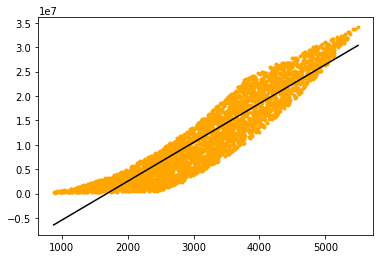

In [441]:
myreg = LinReg(gen_data(3000),['sq feet','price'])
myreg.fit()
myreg.show_line()